In [12]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

Text(0, 0.5, 'Y axis')

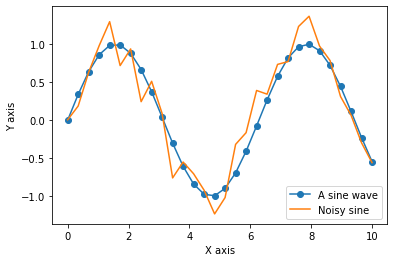

In [13]:
##Hello Matplotlib = mpl
x = np.linspace(0, 10, 30)  #array of 30 points from 0 to 10
y = np.sin(x)
z = y + np.random.normal(size=30) * .2
plt.plot(x, y, 'o-', label='A sine wave')
plt.plot(x, z, '-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [14]:
##Hello Numpy = np
print ("Make a 3 row x 4 column array of random numbers")
x = np.random.random((3, 4))
print (x)
print

print ("Add 1 to every element")
x = x + 1
print (x)
print

print ("Get the element at row 1, column 2") ##Algo no está funcionando bien, revisar
print (x[1, 2])
print

# The colon syntax is called "slicing" the array. 
print ("Get the first row")
print (x[0, :])
print

print ("Get every 2nd column of the first row") #Esta esta tomando la primera y la tercera columna
print (x[0, ::2])
print

Make a 3 row x 4 column array of random numbers
[[0.33810331 0.90294029 0.54026244 0.56683327]
 [0.88498287 0.39397929 0.65258781 0.56322183]
 [0.44544709 0.19896991 0.1300917  0.91940852]]
Add 1 to every element
[[1.33810331 1.90294029 1.54026244 1.56683327]
 [1.88498287 1.39397929 1.65258781 1.56322183]
 [1.44544709 1.19896991 1.1300917  1.91940852]]
Get the element at row 1, column 2
1.6525878050037868
Get the first row
[1.33810331 1.90294029 1.54026244 1.56683327]
Get every 2nd column of the first row
[1.33810331 1.54026244]


<function print>

In [15]:
print ("Max is  ", x.max())
print ("Min is  ", x.min())
print ("Mean is ", x.mean())

Max is   1.9194085207319918
Min is   1.1300917027734267
Mean is  1.544735694148863


In [16]:
print (x.max(axis=1))

[1.90294029 1.88498287 1.91940852]


In [17]:
x = np.random.binomial(500, .5)
print ("number of heads:", x)

number of heads: 227


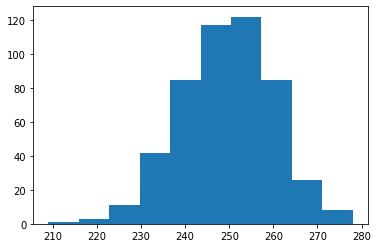

In [18]:
# 3 ways to run the simulations

# loop
heads = []
for i in range(500):
    heads.append(np.random.binomial(500, .5))

# "list comprehension"
heads = [np.random.binomial(500, .5) for i in range(500)]

# pure numpy
heads = np.random.binomial(500, .5, size=500)

histogram = plt.hist(heads, bins=10)

In [19]:
heads.shape

(500,)

In [20]:
def simulate_prizedoor(nsim):
    return np.random.randint(0, 3, (nsim))

In [21]:
def simulate_guess(nsim):
    return np.zeros(nsim, dtype=np.int)

In [22]:
def goat_door(prizedoors, guesses):
    
    #strategy: generate random answers, and
    #keep updating until they satisfy the rule
    #that they aren't a prizedoor or a guess
    result = np.random.randint(0, 3, prizedoors.size)
    while True:
        bad = (result == prizedoors) | (result == guesses)
        if not bad.any():
            return result
        result[bad] = np.random.randint(0, 3, bad.sum())

In [23]:
def switch_guess(guesses, goatdoors):
    result = np.zeros(guesses.size)
    switch = {(0, 1): 2, (0, 2): 1, (1, 0): 2, (1, 2): 1, (2, 0): 1, (2, 1): 0}
    for i in [0, 1, 2]:
        for j in [0, 1, 2]:
            mask = (guesses == i) & (goatdoors == j)
            if not mask.any():
                continue
            result = np.where(mask, np.ones_like(result) * switch[(i, j)], result)
    return result

In [24]:
def win_percentage(guesses, prizedoors):
    return 100 * (guesses == prizedoors).mean()

In [25]:
nsim = 10000

#keep guesses
print ("Win percentage when keeping original door")
print (win_percentage(simulate_prizedoor(nsim), simulate_guess(nsim)))

#switch
pd = simulate_prizedoor(nsim)
guess = simulate_guess(nsim)
goats = goat_door(pd, guess)
guess = switch_guess(guess, goats)
print ("Win percentage when switching doors")
print (win_percentage(pd, guess).mean())

Win percentage when keeping original door
33.62
Win percentage when switching doors
66.09
